# Полносвязная нейросеть на датасете MNIST

In [ ]:
import torch 

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')  
device

device(type='cuda', index=0)

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs
import torch.nn as nn
from torchsummary import summary
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
data_tfs = tfs.Compose([
  tfs.ToTensor(),
  tfs.Normalize((0.5), (0.5))
])

In [ ]:
root = './'
train = MNIST(root, train=True,  transform=data_tfs, download=True)
test  = MNIST(root, train=False, transform=data_tfs, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
from torch.utils.data import DataLoader

batch_size = 256

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [ ]:
x_batch, y_batch = next(iter(train_loader))

In [ ]:
features = 784
classes = 10

In [ ]:
model = nn.Sequential(
  nn.Linear(features, 128),
  nn.ReLU(),
  nn.Linear(128, classes)
)

model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
summary(model, (features,), batch_size=228)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [228, 128]         100,480
              ReLU-2                 [228, 128]               0
            Linear-3                  [228, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.68
Forward/backward pass size (MB): 0.46
Params size (MB): 0.39
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


In [ ]:
criterion = nn.CrossEntropyLoss()     
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

In [ ]:
epochs = 3
history = []

In [ ]:
for i in range(epochs):
  for x_batch, y_batch in train_loader:

    x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
    y_batch = y_batch.to(device)

    logits = model(x_batch)

    loss = criterion(logits, y_batch)
    history.append(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

  print(f'{i+1},\t loss: {history[-1]}')

1,	 loss: 0.35633668303489685
2,	 loss: 0.3228175640106201
3,	 loss: 0.29527127742767334


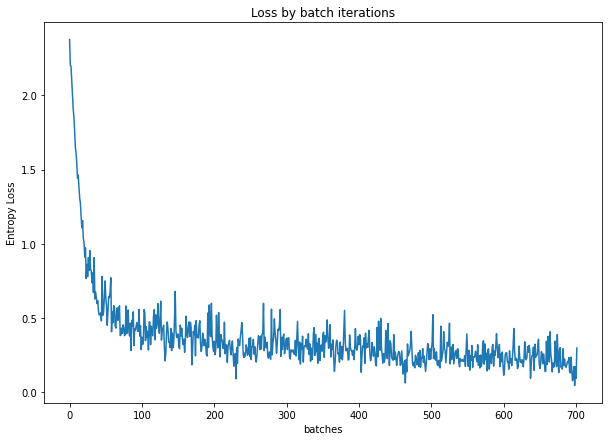

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

In [ ]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
  # загружаем батч данных (вытянутый в линию)
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
  y_batch = y_batch.to(device)

  preds = torch.argmax(model(x_batch), dim=1)
  acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.94


In [ ]:
#Введите число

n = 6666

In [ ]:
import numpy as np

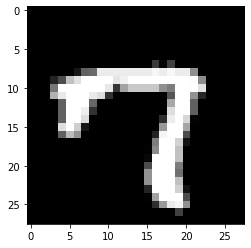

In [ ]:
#Картинка из датасета

from matplotlib import pyplot as plt
first_image = train[n][0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
#Предсказание нейросети

experiment = train[n][0]
experiment = experiment.reshape(experiment.shape[0], -1).to(device)
logit = model(experiment)
predictions = torch.exp(logit) / torch.exp(logit).sum(dim=1, keepdims=True)
predictions = predictions.to('cpu')
predictions = predictions.detach().numpy()
predictions.argmax()

7